<a href="https://colab.research.google.com/github/ia-nechaev/aqm2022/blob/main/Exercises_chapter13_part2_answered.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import math
from sklearn.linear_model import LinearRegression

# Bike counters

In [37]:
bk2=pd.read_csv('https://raw.githubusercontent.com/ia-nechaev/aqm2022/main/data/hrngv.csv',index_col='date',parse_dates=True) # filenames for other regions: hrngv.csv, sndbr.csv

In [3]:
bk

,nbikes,tmpc,relh,vsby,sknt,drct,holiday,PRCP,TAVG,dry day,phenomenon,weekday,daylight_hrs
date,,,,,,,,,,,,,
2020-01-02,156,6.208333,88.103750,6.029167,18.791667,231.666667,False,0.3,6.2,0,NaN,Thursday,6.544737
2020-01-03,116,6.333333,84.771667,5.302083,16.875000,257.083333,False,1.8,6.3,0,Light rain,Friday,6.570688
2020-01-11,290,5.333333,92.099583,5.315000,18.625000,210.416667,False,0.3,5.0,0,Light drizzle,Saturday,6.849080
2020-01-13,534,4.250000,93.289583,6.210000,10.000000,195.416667,False,1.0,4.2,0,NaN,Monday,6.936836
2020-01-14,400,6.958333,90.811250,5.496667,16.916667,190.000000,False,3.3,6.7,0,Light rain,Tuesday,6.983195
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-02,627,11.000000,87.470000,6.210000,10.000000,290.000000,False,0.3,14.8,0,NaN,Sunday,11.104588
2022-10-02,720,11.000000,87.470000,6.210000,10.000000,290.000000,False,4.3,13.1,0,NaN,Sunday,11.104588
2022-10-02,336,11.000000,87.470000,6.210000,10.000000,290.000000,False,0.5,14.4,0,NaN,Sunday,11.104588


## Data description



nbikes — Number of bikes per day

tmpc —  Air Temperature in C

relh — Relative Humidity in %

vsby — Visibility in miles

sknt — Wind Speed in knots

drct — Wind Direction in degrees from true north

holiday — If the day is a holiday

PRCP — Precipitation in mm

TAVG — Average temperature in C

dry day — if the PRCP value equals 0 

phenomenon — weather phenomenon

weekday — day of the week

daylight_hrs — amount of hours of light a day

## Some functions that we might need:






`sns.boxenplot(x='',y='',data=mydata)`

`sns.pairplot(mydata)`


```
#fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(bk.corr()) # cmap='RdBu', annot=True
```


```
#define IDVs and DV
X = bk[['']]
y = bk['']

#add constant variable
X = sm.add_constant(X)

#fit linear regression model
model = sm.OLS(y, X).fit()

#save predicted values in a df
bk['predicted'] = model.predict(X)

#view model summary
print(model.summary())

```



```
bk[['nbikes', 'predicted']].plot(alpha=0.5);
```



```
!pip install stargazer -q
from stargazer.stargazer import Stargazer
m_compare=Stargazer([model_1,model_2])
m_compare

m_compare.render_latex()
m_compare.render_html()
```


`bk['holiday']=bk['holiday'].astype('category').cat.codes`

`bk=pd.get_dummies(bk, columns=['weekday'], prefix = '', prefix_sep='')`

`bk.corr()`


# Data Visualization


In [24]:
bk['phenomenon'].value_counts()

Light rain           66
None mist            33
None fog             29
Light drizzle         9
None rain             8
Light snow            7
Light ice pellets     1
Name: phenomenon, dtype: int64

In [10]:
bk.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 749 entries, 2020-01-02 to 2022-10-02
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   nbikes        749 non-null    int64  
 1   tmpc          749 non-null    float64
 2   relh          749 non-null    float64
 3   vsby          749 non-null    float64
 4   sknt          749 non-null    float64
 5   drct          749 non-null    float64
 6   holiday       749 non-null    bool   
 7   PRCP          749 non-null    float64
 8   TAVG          749 non-null    float64
 9   dry day       749 non-null    int64  
 10  phenomenon    153 non-null    object 
 11  weekday       749 non-null    object 
 12  daylight_hrs  749 non-null    float64
dtypes: bool(1), float64(8), int64(2), object(2)
memory usage: 76.8+ KB


In [5]:
bk.corr()

,nbikes,tmpc,relh,vsby,sknt,drct,holiday,PRCP,TAVG,dry day,daylight_hrs
nbikes,1.000000,0.285962,-0.245125,0.187266,-0.139725,-0.015497,-0.250362,-0.099452,0.284748,0.179408,0.285462
tmpc,0.285962,1.000000,-0.268530,0.234127,0.018948,0.108138,-0.116605,-0.036030,0.998680,0.147098,0.749161
relh,-0.245125,-0.268530,1.000000,-0.558627,0.046441,-0.008816,0.041580,0.223077,-0.268366,-0.328198,-0.531353
vsby,0.187266,0.234127,-0.558627,1.000000,0.124535,0.118689,-0.055800,-0.034367,0.237263,0.093733,0.347587
sknt,-0.139725,0.018948,0.046441,0.124535,1.000000,0.302039,-0.053193,0.181865,0.019061,-0.292116,-0.099563
drct,-0.015497,0.108138,-0.008816,0.118689,0.302039,1.000000,-0.022090,0.029904,0.114330,-0.155266,0.108471
holiday,-0.250362,-0.116605,0.041580,-0.055800,-0.053193,-0.022090,1.000000,-0.054141,-0.115982,-0.026853,-0.049525
PRCP,-0.099452,-0.036030,0.223077,-0.034367,0.181865,0.029904,-0.054141,1.000000,-0.037008,-0.471735,-0.082477
TAVG,0.284748,0.998680,-0.268366,0.237263,0.019061,0.114330,-0.115982,-0.037008,1.000000,0.144953,0.748102
dry day,0.179408,0.147098,-0.328198,0.093733,-0.292116,-0.155266,-0.026853,-0.471735,0.144953,1.000000,0.267192


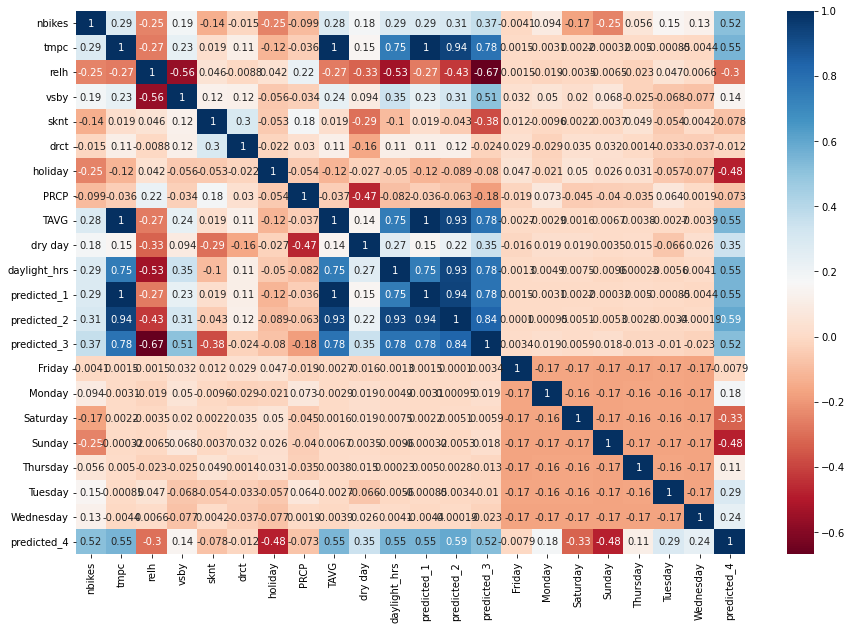

In [43]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(bk.corr(), cmap='RdBu', annot=True)

# Setting-up RQ and hypothesis



# Simple bi-variate regression

In [11]:
X = bk[['tmpc']]
y = bk['nbikes']


#add constant to predictor variables
X = sm.add_constant(X)

#fit linear regression model
model_1 = sm.OLS(y, X).fit()
bk['predicted_1'] = model_1.predict(X)
#view model summary
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 nbikes   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     66.53
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           1.46e-15
Time:                        17:07:52   Log-Likelihood:                -5133.4
No. Observations:                 749   AIC:                         1.027e+04
Df Residuals:                     747   BIC:                         1.028e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        385.2429     14.959     25.752      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


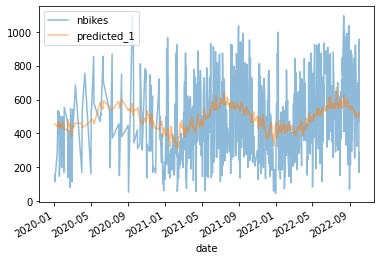

In [13]:
# plot the data and predicted variables
bk[['nbikes', 'predicted_1']].plot(alpha=0.5);

# Multivariate regression

In [14]:
bk.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 749 entries, 2020-01-02 to 2022-10-02
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   nbikes        749 non-null    int64  
 1   tmpc          749 non-null    float64
 2   relh          749 non-null    float64
 3   vsby          749 non-null    float64
 4   sknt          749 non-null    float64
 5   drct          749 non-null    float64
 6   holiday       749 non-null    bool   
 7   PRCP          749 non-null    float64
 8   TAVG          749 non-null    float64
 9   dry day       749 non-null    int64  
 10  phenomenon    153 non-null    object 
 11  weekday       749 non-null    object 
 12  daylight_hrs  749 non-null    float64
 13  predicted_1   749 non-null    float64
dtypes: bool(1), float64(9), int64(2), object(2)
memory usage: 82.7+ KB


In [15]:
X = bk[['tmpc', 'daylight_hrs']]
y = bk['nbikes']

#add constant to predictor variables
X = sm.add_constant(X)

#fit linear regression model
model_2 = sm.OLS(y, X).fit()
bk['predicted_2'] = model_2.predict(X)
#view model summary
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 nbikes   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     38.40
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           1.34e-16
Time:                        17:19:09   Log-Likelihood:                -5128.7
No. Observations:                 749   AIC:                         1.026e+04
Df Residuals:                     746   BIC:                         1.028e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          303.7382     30.322     10.017   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


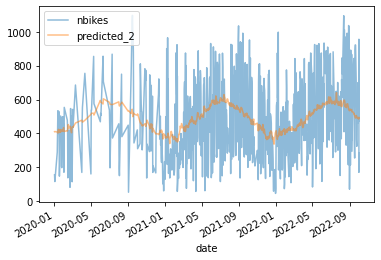

In [17]:
bk[['nbikes', 'predicted_2']].plot(alpha=0.5);

In [19]:
# defining data
X = bk[['tmpc','relh', 'vsby', 'sknt']]
y = bk['nbikes']

#add constant to predictor variables
X = sm.add_constant(X)

#fit linear regression model
model_3 = sm.OLS(y, X).fit()
bk['predicted_3'] = model_3.predict(X)
#view model summary
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                 nbikes   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     28.95
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           2.17e-22
Time:                        17:34:52   Log-Likelihood:                -5111.2
No. Observations:                 749   AIC:                         1.023e+04
Df Residuals:                     744   BIC:                         1.026e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        614.2212    123.298      4.982      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


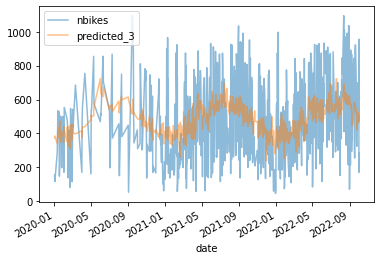

In [20]:
bk[['nbikes', 'predicted_3']].plot(alpha=0.5);

# Multivariate regression with categorical IDVs

## Transforming categorical variables

In [21]:
bk.columns

Index(['nbikes', 'tmpc', 'relh', 'vsby', 'sknt', 'drct', 'holiday', 'PRCP',
       'TAVG', 'dry day', 'phenomenon', 'weekday', 'daylight_hrs',
       'predicted_1', 'predicted_2', 'predicted_3'],
      dtype='object')

In [23]:
bk['weekday']

date
2020-01-02    Thursday
2020-01-03      Friday
2020-01-11    Saturday
2020-01-13      Monday
2020-01-14     Tuesday
                ...   
2022-10-02      Sunday
2022-10-02      Sunday
2022-10-02      Sunday
2022-10-02      Sunday
2022-10-02      Sunday
Name: weekday, Length: 749, dtype: object

In [ ]:
bk=pd.get_dummies(bk, columns=['weekday'], prefix = '', prefix_sep='')

In [26]:
bk['holiday']=bk['holiday'].astype('category').cat.codes # works for binary variable

## Visulizing new heatmap

## Making regression models according to our hypothesis

In [27]:
bk.columns

Index(['nbikes', 'tmpc', 'relh', 'vsby', 'sknt', 'drct', 'holiday', 'PRCP',
       'TAVG', 'dry day', 'phenomenon', 'daylight_hrs', 'predicted_1',
       'predicted_2', 'predicted_3', 'Friday', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [29]:
X = bk[['tmpc','holiday','dry day', 'Monday', 'Tuesday', 'Wednesday','Thursday',
        'Friday', 'Saturday', 'Sunday', 'daylight_hrs']]
y = bk['nbikes']

#no need to add constant to predictor variables

#fit linear regression model
model_4 = sm.OLS(y, X).fit()
bk['predicted_4'] = model_4.predict(X)
#view model summary
print(model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                 nbikes   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     26.84
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           8.09e-44
Time:                        17:53:23   Log-Likelihood:                -5049.2
No. Observations:                 749   AIC:                         1.012e+04
Df Residuals:                     738   BIC:                         1.017e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
tmpc             5.6675      1.855      3.055   

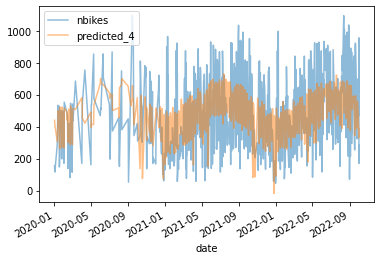

In [30]:
bk[['nbikes', 'predicted_4']].plot(alpha=0.5);

# Comparing model results

In [31]:
!pip install stargazer -q
from stargazer.stargazer import Stargazer

In [34]:
m_compare=Stargazer([model_1,model_2,model_3,model_4])
m_compare

# Check the regression

Ex-ante checks:
- Number of observations (>10)
- Type of dependent variable (categorical/continous)
- Linearity (linear dependence)

Ex-post checks (with potentially model refinement)
- Multicollinearity (VIF)
- Outlier (Cook's distance)
- Normal distribution of residuals (QQplot, Shapiro-Wilk) (non-linear transformation to fix)
- Heteroscedasticity (Breusch-Pagan)
- Autocorrelation (spatial - Moran-correlation coefficient I /temporal - Panel & time series analysis)

## Test for normality of residuals

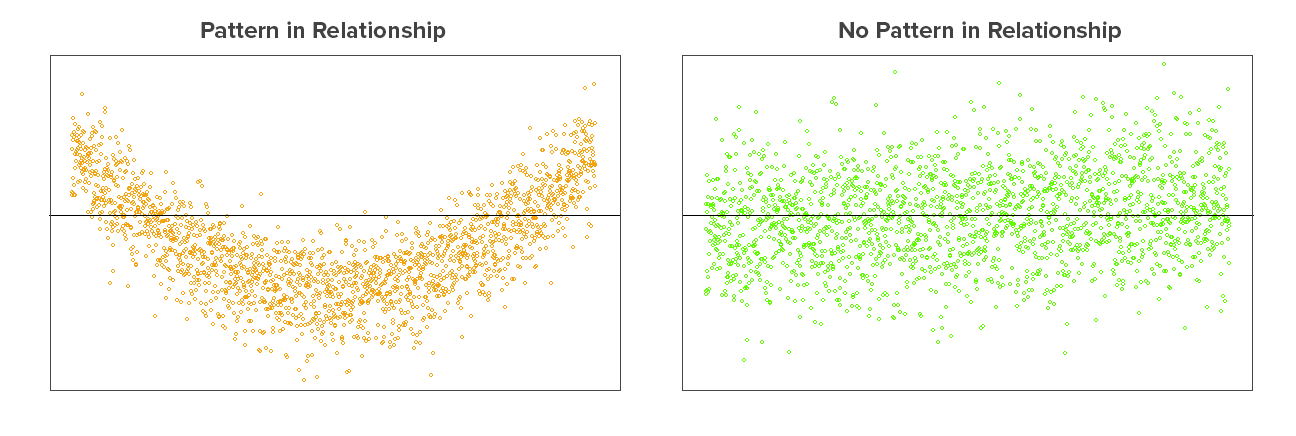

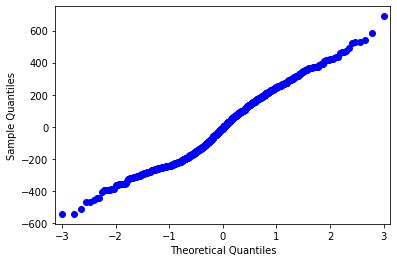

In [35]:
# Normality of residuals
fig = sm.qqplot(model_3.resid)
plt.show()

## Test fo Multicollinearity (VIF)

In [41]:
#test fo Multicollinearity (VIF)

from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#find design matrix for linear regression model using 'rating' as response variable 
y, X = dmatrices('nbikes ~ tmpc+relh+vsby', data=bk, return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

#view VIF for each explanatory variable 
vif

,VIF,variable
0,228.042474,Intercept
1,1.089793,tmpc
2,1.497314,relh
3,1.469919,vsby


## Test for heteroscedasticity

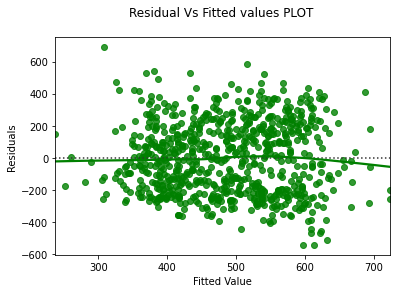

In [42]:
# Heteroscedasticity (exact: Breusch-Pagan test)
ax = sns.residplot(x=bk['predicted_3'], y=model_3.resid, lowess = True, color = "g")
ax.set(xlabel='Fitted Value', ylabel='Residuals', title = 'Residual Vs Fitted values PLOT \n')
plt.show()

# Discussing results

Check your hypothesis (supported/unsupported).

Explain statistically significant relations.

Discuss the limitations of your model:

Our model is almost certainly missing some relevant information. For example, nonlinear effects (such as effects of precipitation and cold temperature) and nonlinear trends within each variable (such as disinclination to ride at very cold and very hot temperatures) cannot be accounted for in this model. Additionally, we have thrown away some of the finer-grained information (such as the difference between a rainy morning and a rainy afternoon), and we have ignored correlations between days (such as the possible effect of a rainy Tuesday on Wednesday’s numbers, or the effect of an unexpected sunny day after a streak of rainy days).